## Realtime Plotting

The purpose of this notebook is to demonstrated techniques for realtime plotting and display within a Jupyter notebook. These techniques are not documented (to the best of my knowledge), and so this is a simple repository of methods that I have used in my own projects.

## Basic Animation with Matplotlib

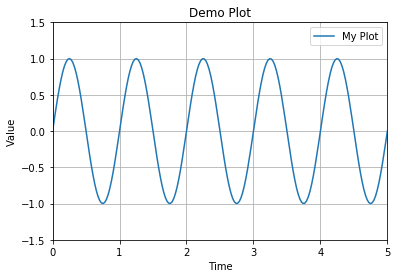

In [37]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

# create an empty plot, and keep the line object around
t = []
y = []
li, = plt.plot(t,y)
plt.xlim(0,5)
plt.ylim(-1.5,1.5)
plt.title('Demo Plot')
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend(['My Plot'])
plt.grid()

# append to the line object on each iteration. Use IPython display
# to clear and redisplay the current figure window
for tp in np.linspace(0,5,200):
    li.set_xdata(np.append(li.get_xdata(),tp))
    li.set_ydata(np.append(li.get_ydata(),np.sin(2*np.pi*w*tp)))
    display.clear_output(wait=True)
    display.display(pl.gcf())

# close the plot to avoid the matplotlib's duplicate display
plt.close()

## Realtime Plotting with Simpy

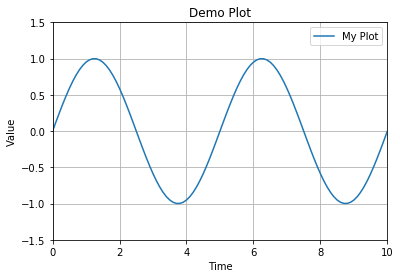

In [46]:
%matplotlib inline
import simpy.rt
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

# create an empty plot, and keep the line object around
t = []
y = []
li, = plt.plot(t,y)
plt.xlim(0,10)
plt.ylim(-1.5,1.5)
plt.title('Demo Plot')
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend(['My Plot'])
plt.grid()

# define a function that appends to the plot
omega = 0.2
def rt_plotter(env):
    while True:
        tp = env.now
        li.set_xdata(np.append(li.get_xdata(),tp))
        li.set_ydata(np.append(li.get_ydata(),np.sin(2*omega*np.pi*w*tp)))
        display.clear_output(wait=True)
        display.display(pl.gcf())
        yield env.timeout(.1)
        
env = simpy.rt.RealtimeEnvironment()
env.process(rt_plotter(env))
env.run(until=10)

# close the plot to avoid the matplotlib's duplicate display
plt.close()

In [61]:
a.stop()

'Stop'